# Camada Bronze - CoinMarketCap Cryptocurrency Dataset 2023

Os dados foram obtidos através da plataforma [Kaggle](https://www.kaggle.com/), um repositório público de datasets compilado por Harshal H.

- **Fonte Principal:** [CoinMarketCap Cryptocurrency Dataset 2023](https://www.kaggle.com/datasets/harshalhonde/coinmarketcap-cryptocurrency-dataset-2023/data)

- **Fonte Original:** Os dados são derivados do [CoinMarketCap](https://coinmarketcap.com/), a plataforma líder mundial em rastreamento de preços e capitalização de mercado de criptomoedas. O CoinMarketCap agrega dados de centenas de exchanges e fornece informações em tempo real sobre milhares de ativos digitais.

### Sobre o CoinMarketCap

O CoinMarketCap é a fonte mais referenciada globalmente para informações sobre criptomoedas. A plataforma oferece dados históricos de preços, volumes de negociação, capitalização de mercado e métricas de dominância para mais de 9.000 criptomoedas. Fundado em 2013, tornou-se a ferramenta essencial para investidores, traders e analistas que acompanham o mercado cripto.

O serviço permite que usuários monitorem:
- Preços em tempo real de criptomoedas
- Rankings de capitalização de mercado
- Volumes de negociação em múltiplas exchanges
- Variações percentuais em diferentes períodos temporais
- Informações sobre oferta circulante e máxima de tokens

### Sobre o Dataset

Este dataset contém um snapshot abrangente do mercado de criptomoedas capturado em setembro de 2023, com registros históricos remontando a julho de 2010 (início do Bitcoin). As informações cobrem 24 atributos distintos organizados em quatro categorias principais:

- **Identificação:** Dados básicos como nome, símbolo, ranking no CoinMarketCap e número de pares de mercado onde a criptomoeda é negociada.
- **Dados de Oferta:** Informações sobre oferta circulante, oferta total e oferta máxima de cada criptomoeda, fundamentais para entender a tokenomics.
- **Métricas de Mercado:** Preço atual em USD, volume de negociação em 24 horas, capitalização de mercado, dominância percentual e taxa de turnover.
- **Variações Temporais:** Mudanças percentuais de preço em 1h, 24h, 7d, 30d, 60d, 90d e YTD (Year-to-Date), permitindo análises de volatilidade e tendências.

### Motivação para Escolha do Dataset

A escolha deste conjunto de dados foi motivada por diversos fatores estratégicos que consideramos relevantes tanto do ponto de vista acadêmico quanto profissional:

**1. Familiaridade com o Contexto:**
Nossa equipe possui interesse e conhecimento prévio sobre o mercado de criptomoedas. Acompanhamos regularmente as movimentações do mercado cripto, o que nos permite interpretar os dados com maior profundidade e contexto real.

**2. Riqueza e Complexidade dos Dados:**
O dataset apresenta uma complexidade interessante para análise de dados, com 446.176 registros históricos e 24 atributos. Essa volumetria permite aplicar técnicas avançadas de análise exploratória, visualização de dados e modelagem estatística.

**3. Aplicabilidade Prática:**
Diferentemente de datasets puramente acadêmicos, os dados de criptomoedas têm aplicação direta no mundo real. As análises realizadas podem gerar insights valiosos para:
- Identificação de tendências de mercado
- Análise de volatilidade e risco
- Comparação de performance entre diferentes ativos
- Estudo de correlações e padrões de comportamento
- Suporte a decisões de investimento informadas


### Desafios Identificados e Oportunidades de Tratamento

Nossa análise preliminar do dataset revelou diversos pontos que requerem atenção especial durante o processamento:

**Estrutura Temporal Confusa:**
- O mesmo `cmcRank` aparece múltiplas vezes com timestamps diferentes, dificultando a análise direta

**Valores Ausentes:**
- Campo `maxSupply` frequentemente nulo para criptomoedas sem limite de emissão
- Alguns registros com `ytdPriceChangePercentage` zerado para moedas recentemente listadas

**Consistência de Dados:**
- Verificação de integridade entre oferta circulante, total e máxima
- Validação de que percentuais de mudança refletem corretamente as variações de preço

**Tipos de Dados:**
- Conversão adequada de timestamps para formato datetime
- Garantia de que valores numéricos (preços, volumes, market caps) estejam em formato apropriado para cálculos

# Análise Exploratória dos Dados Brutos

Nesta seção, utilizaremos Python e suas bibliotecas especializadas para realizar uma análise exploratória completa do dataset. As principais ferramentas que empregaremos são **Pandas**, **Zipfile**, **Seaborn**, **Numpy** e **Matplotlib**.

## 1. Importação das Bibliotecas Necessárias

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import zipfile

## 2. Carregamento do Dataset

In [3]:
with zipfile.ZipFile('../archive.zip', 'r') as zip_ref:
    zip_ref.extractall('./')
    
df = pd.read_csv('./currencies_data.csv', sep=',', encoding='utf-8')

## 3. Visualização Inicial dos Dados

Examinamos de maneira breve o dataframe utilizado:

In [3]:
df

,cmcRank,name,symbol,marketPairCount,circulatingSupply,totalSupply,maxSupply,isActive,lastUpdated,dateAdded,...,percentChange1h,percentChange24h,percentChange7d,percentChange30d,percentChange60d,percentChange90d,fullyDilluttedMarketCap,marketCapByTotalSupply,dominance,ytdPriceChangePercentage
0,1,Bitcoin,USD,10442,1.947631e+07,1.947631e+07,2.100000e+07,1,2023-09-04T14:57:00.000Z,2010-07-13T00:00:00.000Z,...,-0.151618,-0.286439,-1.011075,-11.014572,-14.243425,-0.602343,5.427690e+11,5.033874e+11,48.3538,55.4648
1,2,Ethereum,USD,7329,1.202177e+08,1.202177e+08,NaN,1,2023-09-04T14:57:00.000Z,2015-08-07T00:00:00.000Z,...,-0.231393,-0.394296,-1.167014,-11.139750,-13.168089,-11.297800,1.958790e+11,1.958790e+11,18.8155,35.6717
2,3,Tether USDt,USD,61319,8.290017e+10,8.543720e+10,NaN,1,2023-09-04T14:57:00.000Z,2015-02-25T00:00:00.000Z,...,-0.018710,-0.020663,0.011400,0.068201,-0.040030,-0.041019,8.540772e+10,8.540772e+10,7.9604,-0.0037
3,4,BNB,USD,1605,1.538500e+08,1.538500e+08,NaN,1,2023-09-04T14:57:00.000Z,2017-07-25T00:00:00.000Z,...,-0.177729,0.479339,-1.317269,-10.890590,-8.878355,-22.728145,3.315388e+10,3.315388e+10,3.1847,-11.7320
4,5,XRP,USD,1061,5.297770e+10,9.998846e+10,1.000000e+11,1,2023-09-04T14:57:00.000Z,2013-08-04T00:00:00.000Z,...,-0.102062,0.156371,-3.182004,-19.955193,7.952432,-1.844853,5.024069e+10,5.023489e+10,2.5567,48.3061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446171,9280,DeFido,USD,2,0.000000e+00,1.000000e+08,1.000000e+08,1,2023-09-04T15:00:00.000Z,2023-08-09T11:56:51.000Z,...,0.000000,0.000000,-1.250495,-81.643051,-81.643051,-81.643051,1.753517e+04,1.753517e+04,0.0000,0.0000
446172,9281,GunBet,USD,2,0.000000e+00,1.000000e+07,1.000000e+07,1,2023-09-04T15:00:00.000Z,2023-08-10T07:15:33.000Z,...,0.000000,0.000000,-8.083381,-98.944749,-98.944749,-98.944749,1.631004e+04,1.631004e+04,0.0000,0.0000
446173,9282,MosesCoin,USD,1,0.000000e+00,1.000000e+12,1.000000e+12,1,2023-09-04T15:00:00.000Z,2023-08-18T13:02:53.000Z,...,0.000000,-0.161447,-48.158507,-73.641855,-73.641855,-73.641855,9.142545e+04,9.142545e+04,0.0000,0.0000
446174,9283,Shibarium Token,USD,1,0.000000e+00,1.000000e+09,1.000000e+09,1,2023-09-04T15:00:00.000Z,2023-08-21T14:14:42.000Z,...,0.000000,0.000000,-0.440193,-6.455954,-6.455954,-6.455954,7.758348e+05,7.758348e+05,0.0000,0.0000


## 4. Informações Estruturais do Dataset

Analisamos os tipos de dados de cada coluna e identificamos valores ausentes:

In [4]:
# Informações gerais sobre o dataset
print("=" * 80)
print("INFORMAÇÕES ESTRUTURAIS DO DATASET")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("TIPOS DE DADOS POR COLUNA")
print("=" * 80)
print(df.dtypes)

print("\n" + "=" * 80)
row, col = df.shape
print(f'Número de tuplas: {row} | Número de Colunas: {col}')
print("=" * 80)

INFORMAÇÕES ESTRUTURAIS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446176 entries, 0 to 446175
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   cmcRank                   446176 non-null  int64  
 1   name                      446176 non-null  object 
 2   symbol                    446176 non-null  object 
 3   marketPairCount           446176 non-null  int64  
 4   circulatingSupply         446176 non-null  float64
 5   totalSupply               446176 non-null  float64
 6   maxSupply                 347894 non-null  float64
 7   isActive                  446176 non-null  int64  
 8   lastUpdated               446176 non-null  object 
 9   dateAdded                 446176 non-null  object 
 10  name.1                    446176 non-null  object 
 11  price                     446176 non-null  float64
 12  volume24h                 446176 non-null  float64
 13  marketCap

Observamos que existe a nomenclatura `object` como tipo de dado, que no Pandas representa strings ou misturas de tipos.

## 5. Análise de Valores Ausentes

Identificamos e quantificamos valores Nulos e ausentes em cada coluna:

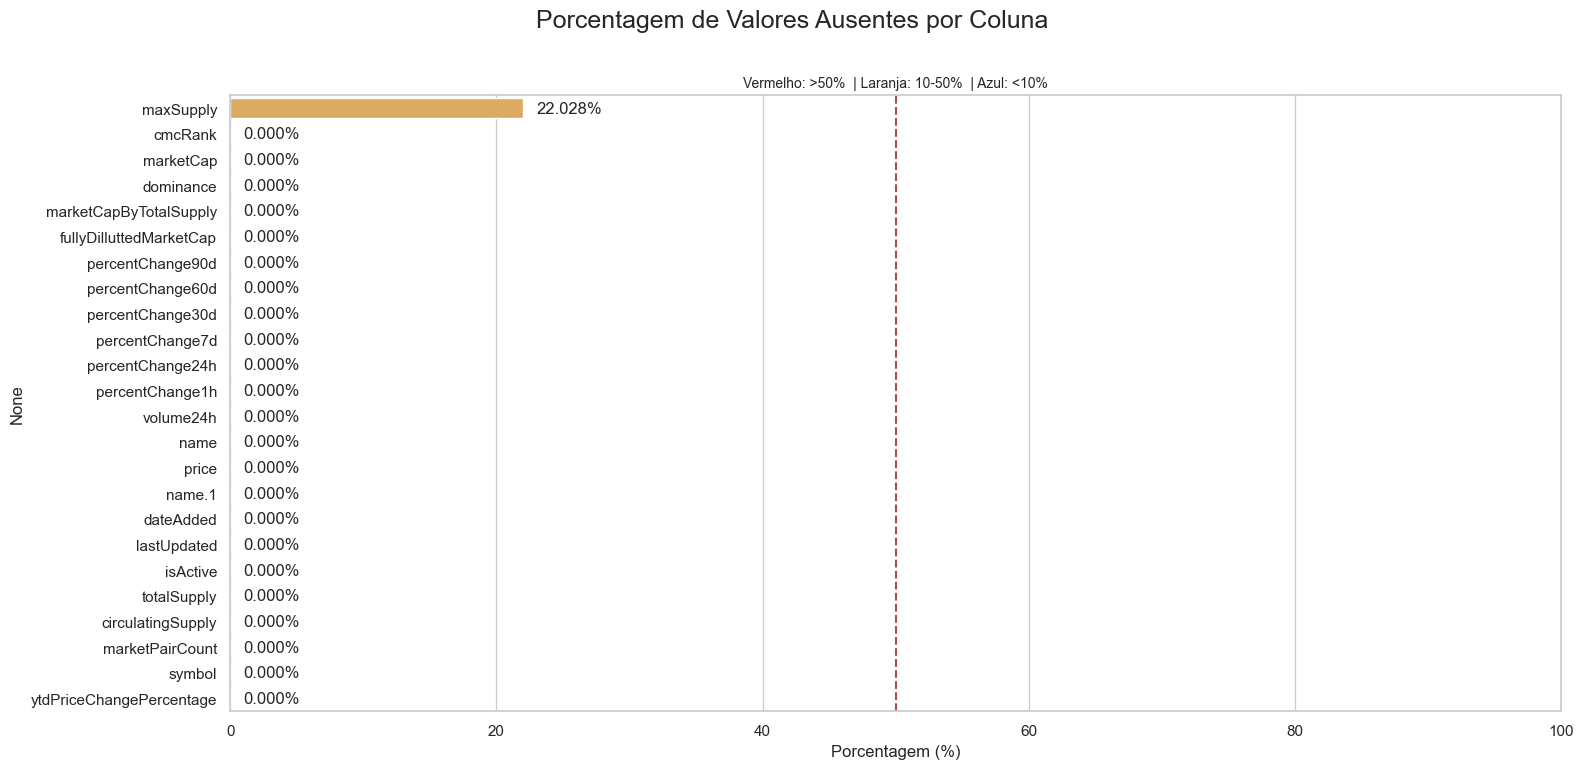

In [5]:
null_perc = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

colors = ['#d9534f' if v > 50 else '#f0ad4e' if v > 10 else '#5bc0de' for v in null_perc.values]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=null_perc.values, y=null_perc.index, hue=null_perc.index, palette=colors, legend=False)

plt.suptitle("Porcentagem de Valores Ausentes por Coluna", fontsize=18, y=0.96)
ax.set_title("Vermelho: >50%  | Laranja: 10-50%  | Azul: <10%", fontsize=10)
ax.set_xlabel("Porcentagem (%)")
ax.set_xlim(0, 100)

for p in ax.patches:
    w = p.get_width()
    ax.text(w + 1, p.get_y() + p.get_height()/2, f'{w:.3f}%', va='center')

ax.axvline(50, color='darkred', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Observamos que apenas a coluna maxSupply possui valores ausentes significativos, com cerca de 22% dos registros apresentando dados faltantes. Isso é esperado para criptomoedas que não têm um limite máximo definido de emissão, como Ethereum e várias outras moedas que não possuem política de supply fixo. Todas as demais colunas têm praticamente 0% de valores ausentes, indicando alta qualidade de preenchimento dos dados na maioria dos campos.

## 6. Estatísticas Descritivas

Examinamos as estatísticas descritivas das colunas numéricas:

In [ ]:

print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS - COLUNAS NUMÉRICAS")
print("=" * 80)
df.describe()

ESTATÍSTICAS DESCRITIVAS - COLUNAS NUMÉRICAS


,cmcRank,marketPairCount,circulatingSupply,totalSupply,maxSupply,isActive,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d,percentChange30d,percentChange60d,percentChange90d,fullyDilluttedMarketCap,marketCapByTotalSupply,dominance,ytdPriceChangePercentage
count,446176.000000,446176.000000,4.461760e+05,4.461760e+05,3.478940e+05,446176.0,4.461760e+05,4.461760e+05,4.461760e+05,446176.000000,4.461760e+05,4.461760e+05,4.461760e+05,4.461760e+05,4.461760e+05,4.461760e+05,4.461760e+05,446176.000000,4.461760e+05
mean,3208.028641,27.813186,3.424276e+14,2.489550e+16,8.165627e+15,1.0,1.731627e+02,1.658354e+06,3.080771e+07,0.167153,5.271015e+02,4.107521e+07,6.201439e+04,2.015879e+08,1.098914e+08,1.417261e+13,1.379872e+13,0.001707,2.007643e+07
std,2233.164810,312.621023,1.413048e+16,1.222347e+18,1.157006e+17,0.0,6.304269e+03,5.007853e+07,9.786379e+08,24.295417,3.848914e+04,4.510294e+09,5.771693e+06,4.856008e+10,2.069530e+10,1.548782e+15,1.547946e+15,0.087682,1.649230e+09
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0,6.140000e-22,0.000000e+00,0.000000e+00,-95.583328,-9.815875e+01,-9.984594e+01,-1.000000e+02,-1.000000e+02,-1.000000e+02,0.000000e+00,0.000000e+00,0.000000,-1.000000e+02
25%,1318.000000,3.000000,0.000000e+00,2.089140e+07,1.000000e+08,1.0,3.464436e-04,5.264874e+02,0.000000e+00,-0.265131,-1.734968e+00,-7.770524e+00,-2.578767e+01,-3.817211e+01,-4.883043e+01,2.279985e+05,1.194436e+05,0.000000,-4.935340e+01
50%,2826.000000,7.000000,0.000000e+00,3.473683e+08,1.000000e+09,1.0,6.296230e-03,1.983847e+04,0.000000e+00,-0.136868,-1.045641e-01,-1.682052e+00,-1.278613e+01,-1.807326e+01,-2.551875e+01,2.258731e+06,1.468423e+06,0.000000,-4.729200e+00
75%,4790.000000,17.000000,5.809866e+07,3.000000e+09,8.050127e+09,1.0,1.007509e-01,1.611429e+05,9.355758e+05,0.000000,1.089004e+00,1.371963e+00,-9.964597e-01,-3.726572e-01,-1.851620e+00,2.268432e+07,1.707048e+07,0.000000,0.000000e+00
max,9284.000000,61319.000000,9.818468e+17,8.731273e+19,4.206900e+18,1.0,4.756083e+05,1.701102e+10,5.033874e+11,2002.191449,2.874015e+06,4.963326e+11,6.138641e+08,1.423367e+13,5.509612e+12,3.157185e+17,3.157185e+17,48.353800,1.950395e+11


Este comando nos fornece uma visão geral das distribuições, médias, medianas e variações dos principais atributos numéricos do dataset. Essas informações são cruciais para entender o comportamento dos dados e identificar possíveis outliers ou anomalias que devem ser tratados na camada Silver.

Pudemos observer que no geral os dados apresentam valores reais, já que os campos com valores negativos são apenas os relacionados a variações percentuais, o que é esperado em um mercado volátil como o de criptomoedas. Além disso, os campos de preço, volume e capitalização de mercado apresentam médias e medianas coerentes com o mercado atual, indicando que os dados são representativos e confiáveis para análises futuras.

## 7. Análise de Colunas Categóricas

Identificamos e analisamos as principais colunas categóricas:

In [6]:
print("=" * 80)
print("ANÁLISE DE COLUNAS CATEGÓRICAS")
print("=" * 80)

print("\nTop 10 Símbolos de Criptomoedas Mais Frequentes:")
print(df['symbol'].value_counts().head(10))

print("\nDistribuição de Status (isActive):")
print(df['isActive'].value_counts())

print(f"\nTotal de criptomoedas únicas (por nome): {df['name'].nunique()}")
print(f"Total de símbolos únicos: {df['symbol'].nunique()}")

ANÁLISE DE COLUNAS CATEGÓRICAS

Top 10 Símbolos de Criptomoedas Mais Frequentes:
symbol
USD    446176
Name: count, dtype: int64

Distribuição de Status (isActive):
isActive
1    446176
Name: count, dtype: int64

Total de criptomoedas únicas (por nome): 9193
Total de símbolos únicos: 1


## 8. Análise de Duplicatas

Investigamos a presença de registros duplicados:

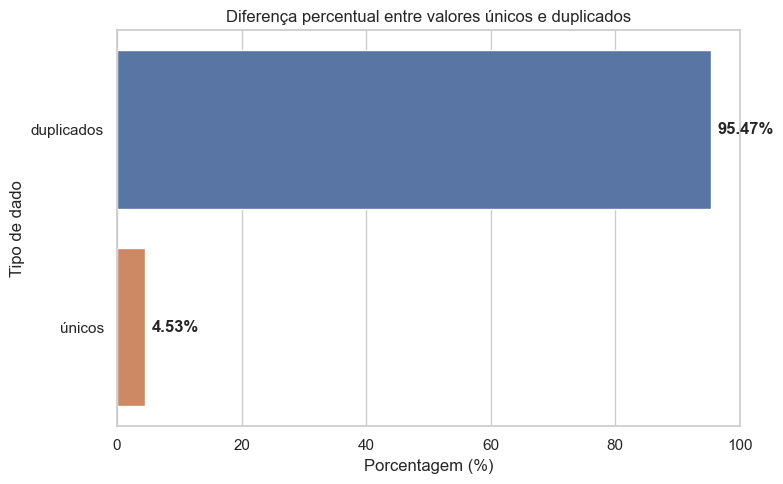

In [8]:
total = len(df)
duplicated = df.duplicated().sum()
unique = total - duplicated

data = {
    'dados': ['duplicados', 'únicos'],
    'total': [duplicated, unique],
}
data['porcentagem'] = [v / total * 100 for v in data['total']]

hue_order = ['duplicados', 'únicos']

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=data,
    x='porcentagem', y='dados',
    hue='dados', hue_order=hue_order,
    dodge=False
)

plt.xlabel("Porcentagem (%)")
plt.ylabel("Tipo de dado")
plt.title('Diferença percentual entre valores únicos e duplicados')

for i, (p, valor) in enumerate(zip(ax.patches, data['porcentagem'])):
    ax.text(p.get_width() + 1, p.get_y() + p.get_height()/2,
            f'{valor:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xlim(0, 100)
plt.yticks([0, 1], data['dados'])

plt.tight_layout()
plt.show()

Observamos que a grande maioria dos registros do dataset são duplicados, ou seja, representam múltiplas ocorrências de criptomoedas já registradas anteriormente (mesmo cmcRank ou outros campos iguais). Apenas cerca de 4,5% dos registros são únicos em todas as colunas, o que indica enorme redundância nos dados. Isso ocorre porque o dataset cobre snapshots históricos ao longo do tempo: a mesma criptomoeda reaparece em múltiplas datas, mas os dados completos (todas as 24 colunas) podem não variar, resultando em registros totalmente duplicados.

Consequências para análise:

Grande redundância pode inflar cálculos estatísticos e distorcer análises se não for tratada (por exemplo, ao calcular médias simples ou contar registros). Para análises históricas (variação ao longo do tempo), valores duplicados podem ser filtrados por data; mas para visão "snapshot", teremos que trabalhar apenas com registros únicos (por exemplo, a última entrada de cada cripto). O elevado número de duplicatas indica que teremos que filtrar na camada Silver.

## 9. Análise das Principais Criptomoedas

Examinamos as criptomoedas com maior capitalização de mercado:

TOP 20 CRIPTOMOEDAS POR CAPITALIZAÇÃO DE MERCADO
      cmcRank         name symbol         price     marketCap     volume24h  dominance
0           1      Bitcoin    USD  25846.144655  5.033874e+11  9.905321e+09    48.3538
1           2     Ethereum    USD   1629.369141  1.958790e+11  3.448460e+09    18.8155
100         2     Ethereum    USD   1629.274894  1.958677e+11  3.448290e+09    18.8144
2           3  Tether USDt    USD      0.999655  8.287157e+10  1.700783e+10     7.9604
101         3  Tether USDt    USD      0.999538  8.286188e+10  1.701102e+10     7.9595
300         3  Tether USDt    USD      0.999538  8.286188e+10  1.701102e+10     7.9595
3           4          BNB    USD    215.494911  3.315388e+10  3.469035e+08     3.1847
102         4          BNB    USD    215.491307  3.315333e+10  3.475118e+08     3.1846
301         4          BNB    USD    215.491307  3.315333e+10  3.475118e+08     3.1846
600         4          BNB    USD    215.491307  3.315333e+10  3.475118e+08     3

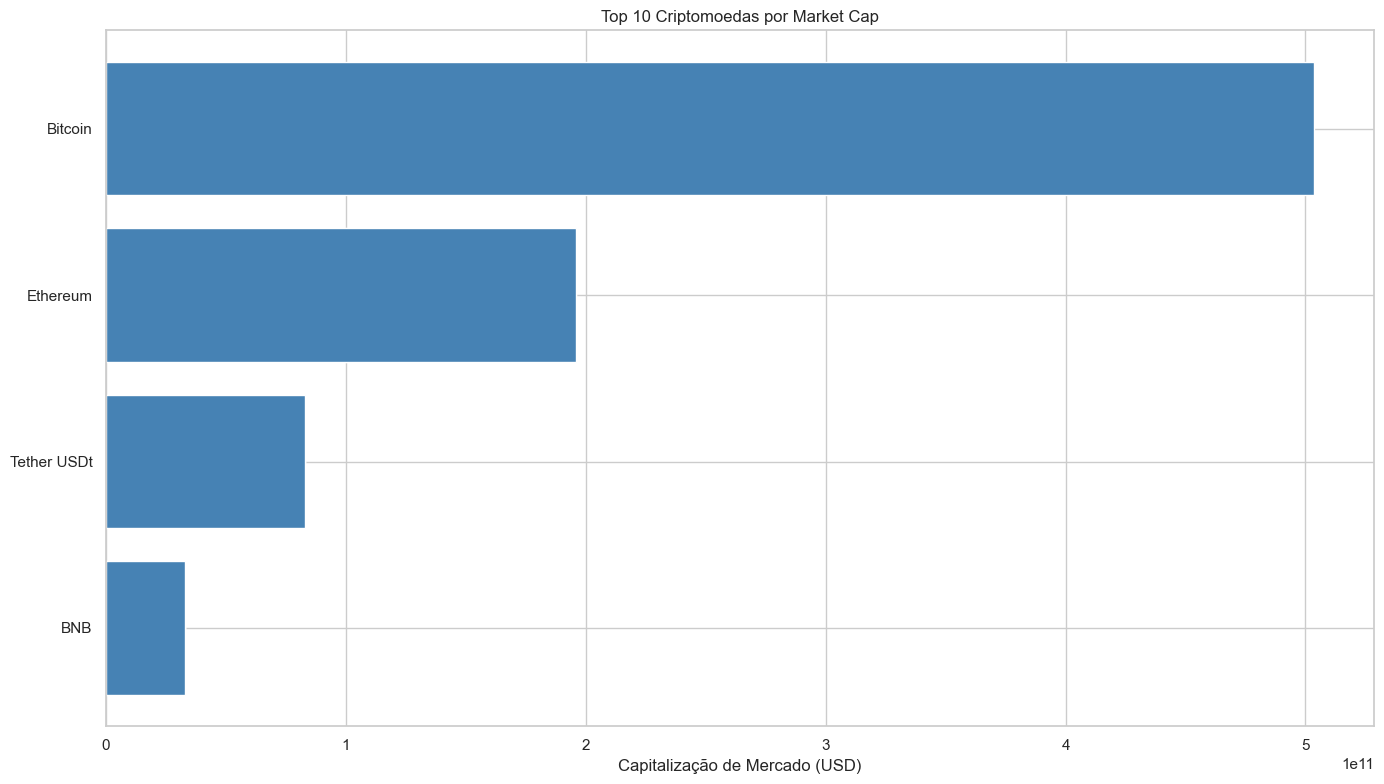

In [9]:
print("=" * 80)
print("TOP 20 CRIPTOMOEDAS POR CAPITALIZAÇÃO DE MERCADO")
print("=" * 80)

top_20 = df.nlargest(20, 'marketCap')[['cmcRank', 'name', 'symbol', 'price', 
                                         'marketCap', 'volume24h', 'dominance']]
print(top_20.to_string())

plt.figure(figsize=(14, 8))
top_10 = df.nlargest(10, 'marketCap')
plt.barh(top_10['name'], top_10['marketCap'], color='steelblue')
plt.xlabel('Capitalização de Mercado (USD)')
plt.title('Top 10 Criptomoedas por Market Cap')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 10. Distribuição de Preços e Volumes

Analisamos a distribuição de preços e volumes de negociação:

ANÁLISE DE DISTRIBUIÇÃO DE PREÇOS

Preço médio: $173.16
Preço mediano: $0.01
Preço mínimo: $0.0000000000
Preço máximo: $475608.35
Desvio padrão: $6304.27


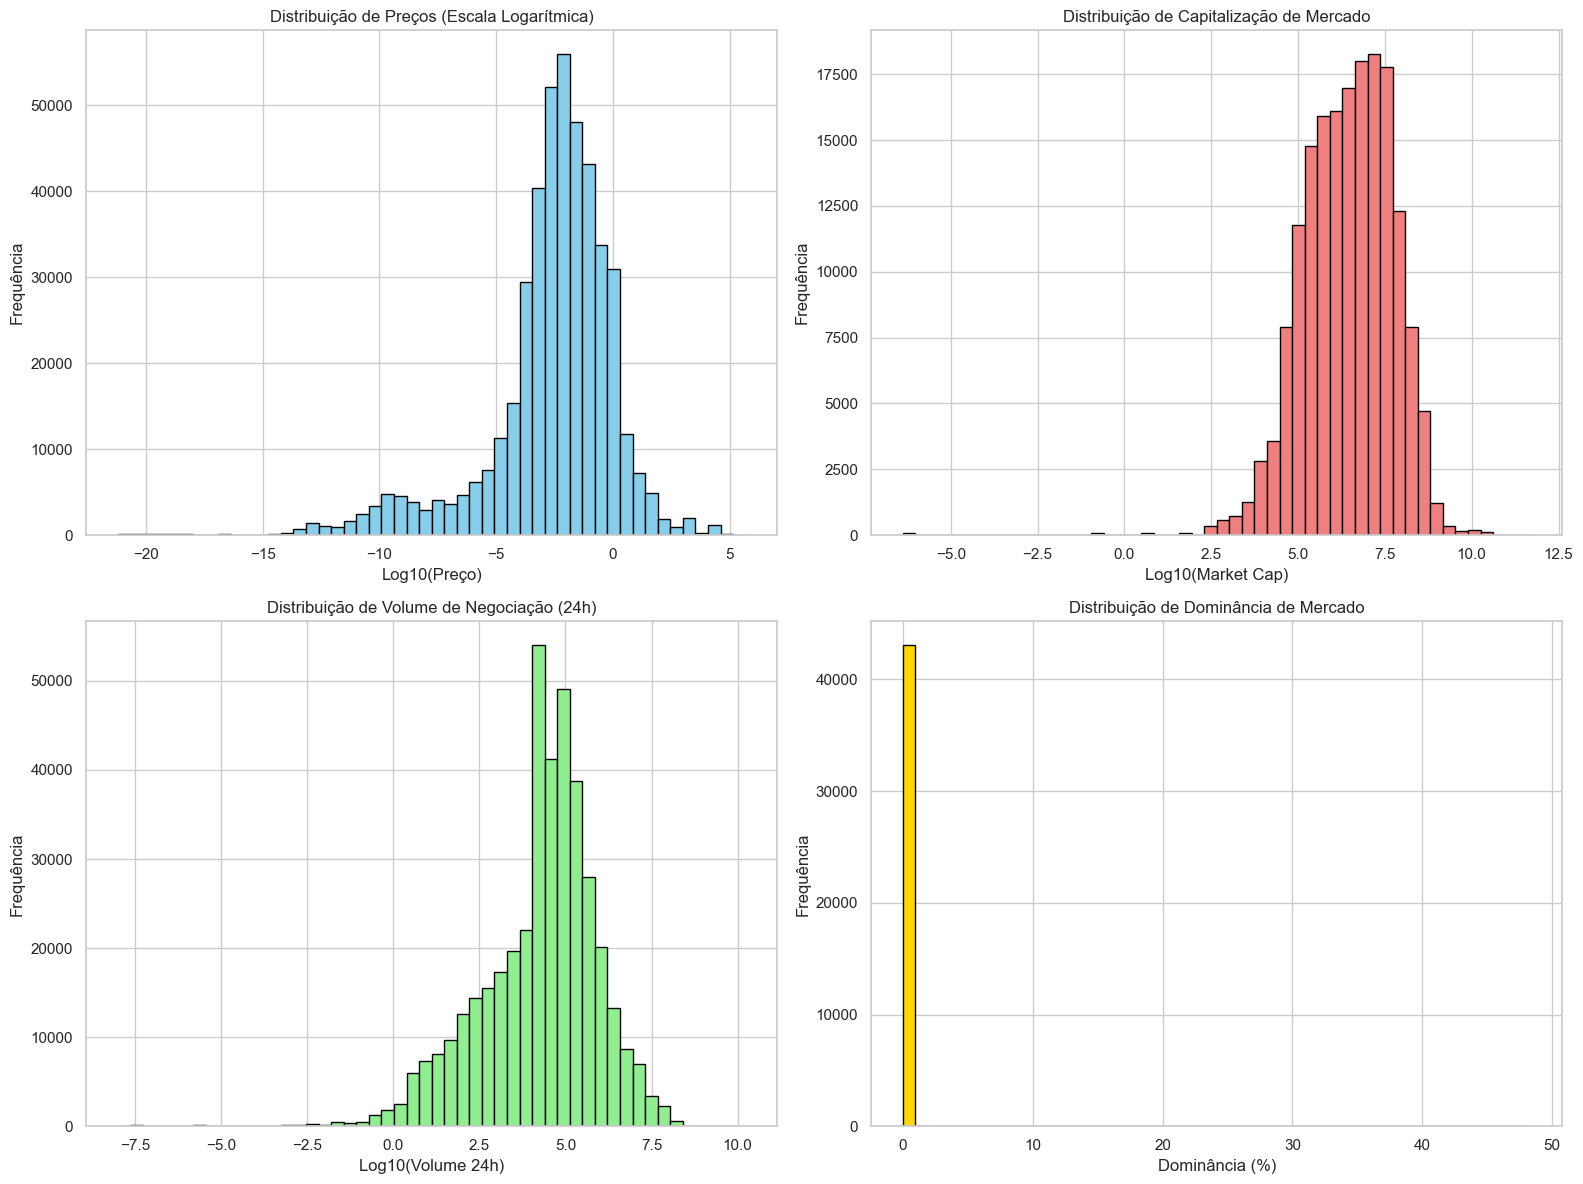

In [ ]:
print("=" * 80)
print("ANÁLISE DE DISTRIBUIÇÃO DE PREÇOS")
print("=" * 80)

print(f"\nPreço médio: ${df['price'].mean():.2f}")
print(f"Preço mediano: ${df['price'].median():.2f}")
print(f"Preço mínimo: ${df['price'].min():.10f}")
print(f"Preço máximo: ${df['price'].max():.2f}")
print(f"Desvio padrão: ${df['price'].std():.2f}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].hist(np.log10(df['price'][df['price'] > 0]), bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Log10(Preço)')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].set_title('Distribuição de Preços (Escala Logarítmica)')

axes[0, 1].hist(np.log10(df['marketCap'][df['marketCap'] > 0]), bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('Log10(Market Cap)')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].set_title('Distribuição de Capitalização de Mercado')

axes[1, 0].hist(np.log10(df['volume24h'][df['volume24h'] > 0]), bins=50, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Log10(Volume 24h)')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].set_title('Distribuição de Volume de Negociação (24h)')

axes[1, 1].hist(df['dominance'][df['dominance'] > 0], bins=50, color='gold', edgecolor='black')
axes[1, 1].set_xlabel('Dominância (%)')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('Distribuição de Dominância de Mercado')

plt.tight_layout()
plt.show()

Esta análise permite entender a distribuição dos principais valores quantitativos individuais do dataset de criptomoedas: preço, capitalização de mercado, volume de negociação em 24 horas e dominância de mercado. Isso é fundamental em datasets financeiros porque preços, volumes e market caps normalmente têm distribuição log-normal, com poucos valores muito grandes e muitos valores pequenos. Uma visualização errada pode esconder padrões ou distorcer qualquer inferência/estatística aplicada.

A análise revela fortíssima concentração de valor, volume e dominância em poucas moedas, enquanto a grande massa apresenta valores baixos ou quase irrelevantes. A dispersão é altíssima, e os dados precisam ser analisados com técnicas apropriadas para distribuições desse tipo (log-scale e recortes por percentil). Estes achados também embasam decisões de limpeza, transformação e melhor escolha de métricas para investigações na camada Silver.

## 11. Análise de Volatilidade

Examinamos as variações percentuais em diferentes períodos temporais:

ANÁLISE DE VOLATILIDADE - VARIAÇÕES PERCENTUAIS

Estatísticas de Variações Percentuais:
       percentChange1h  percentChange24h  percentChange7d  percentChange30d  \
count    446176.000000      4.461760e+05     4.461760e+05      4.461760e+05   
mean          0.167153      5.271015e+02     4.107521e+07      6.201439e+04   
std          24.295417      3.848914e+04     4.510294e+09      5.771693e+06   
min         -95.583328     -9.815875e+01    -9.984594e+01     -1.000000e+02   
25%          -0.265131     -1.734968e+00    -7.770524e+00     -2.578767e+01   
50%          -0.136868     -1.045641e-01    -1.682052e+00     -1.278613e+01   
75%           0.000000      1.089004e+00     1.371963e+00     -9.964597e-01   
max        2002.191449      2.874015e+06     4.963326e+11      6.138641e+08   

       percentChange60d  percentChange90d  
count      4.461760e+05      4.461760e+05  
mean       2.015879e+08      1.098914e+08  
std        4.856008e+10      2.069530e+10  
min       -1.000000e+02 

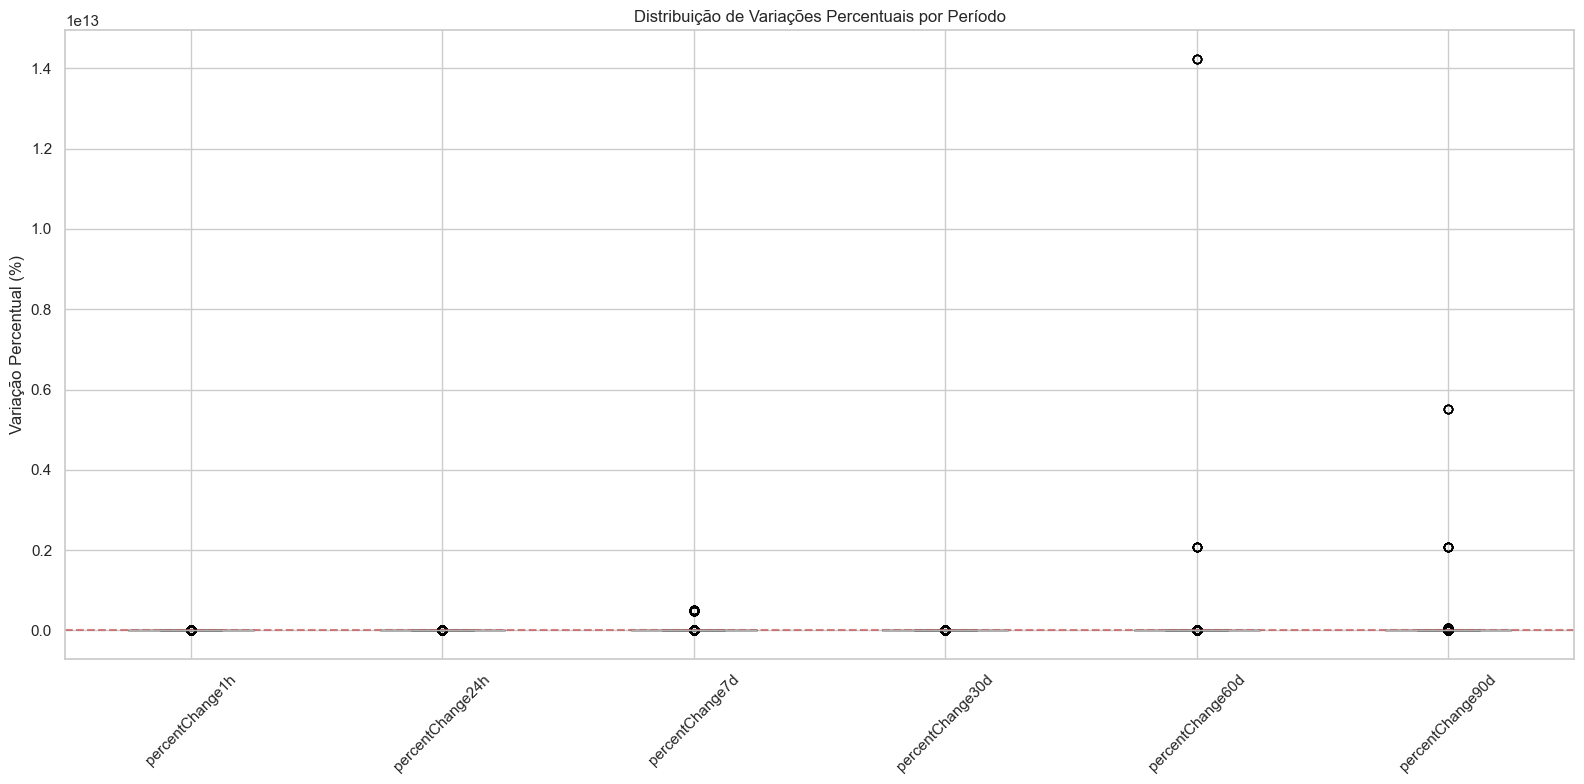


TOP 10 MAIORES GANHOS (24h)
                 name symbol     price  percentChange24h
242886  BitGuild PLAT    USD  0.009196      2.874015e+06
249885  BitGuild PLAT    USD  0.009196      2.874015e+06
256984  BitGuild PLAT    USD  0.009196      2.874015e+06
264183  BitGuild PLAT    USD  0.009196      2.874015e+06
271482  BitGuild PLAT    USD  0.009196      2.874015e+06
278881  BitGuild PLAT    USD  0.009196      2.874015e+06
286380  BitGuild PLAT    USD  0.009196      2.874015e+06
293979  BitGuild PLAT    USD  0.009196      2.874015e+06
301678  BitGuild PLAT    USD  0.009196      2.874015e+06
309477  BitGuild PLAT    USD  0.009196      2.874015e+06

TOP 10 MAIORES PERDAS (24h)
                                  name symbol         price  percentChange24h
241457  Mainstream For The Underground    USD  3.180077e-14        -98.158748
248356  Mainstream For The Underground    USD  3.180077e-14        -98.158748
255355  Mainstream For The Underground    USD  3.180165e-14        -98.158617
262

In [11]:
print("=" * 80)
print("ANÁLISE DE VOLATILIDADE - VARIAÇÕES PERCENTUAIS")
print("=" * 80)

volatility_cols = ['percentChange1h', 'percentChange24h', 'percentChange7d', 
                   'percentChange30d', 'percentChange60d', 'percentChange90d']

volatility_stats = df[volatility_cols].describe()
print("\nEstatísticas de Variações Percentuais:")
print(volatility_stats)

plt.figure(figsize=(16, 8))
df[volatility_cols].boxplot()
plt.ylabel('Variação Percentual (%)')
plt.title('Distribuição de Variações Percentuais por Período')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("TOP 10 MAIORES GANHOS (24h)")
print("=" * 80)
top_gains = df.nlargest(10, 'percentChange24h')[['name', 'symbol', 'price', 'percentChange24h']]
print(top_gains.to_string())

print("\n" + "=" * 80)
print("TOP 10 MAIORES PERDAS (24h)")
print("=" * 80)
top_losses = df.nsmallest(10, 'percentChange24h')[['name', 'symbol', 'price', 'percentChange24h']]
print(top_losses.to_string())

Esta análise explora a volatilidade extrema das criptomoedas, comparando as principais variações percentuais nos períodos de 1 hora, 24h, 7d, 30d, 60d e 90d — e identifica as moedas com os maiores ganhos e perdas em 24h. Além disso esta análise nos permitiu **Identificar Outliers**, **Detectar Altíssima Volatilidade**, **Insights Operacionais:** e nos de uma **Base para Limpeza**

***

## Interpretação dos resultados

Os campos `percentChange*` possuem valores máximos e mínimos absurdamente distantes da média, com desvios-padrão altíssimos. Muitos valores extremos sugerem:
- Dados espúrios, erros na coleta ou atualização dos preços.
- Moedas com volume irrisório (illiquid) que podem valorizar “milhões de %” por uma única transação.
- É importante filtrar/lidar com essas anomalias.

**Boxplot:**  
Os gráficos reforçam visualmente a presença de outliers extremos (muitos pontos fora do bigode do boxplot, puxando o eixo para escalas atípicas, prejudicando a visualização das médias reais e tornando difícil até para o box ser visto).

### Top 10 maiores ganhos em 24h
- Todas as posições são ocupadas pela "BitGuild PLAT", com um salto idêntico de mais de 2,8 milhões por cento, com preço em torno de 0,009196 USD.
- Isso sugere ou um erro de entrada acentuado ou alguma manipulação drástica ou glitch na plataforma de coleta.

### Top 10 maiores perdas em 24h
- Dominado por "Mainstream For The Underground", com variação de aproximadamente -98,16% (e preços mínimos, próximos de zero absoluto, na casa do 1e-14).
- Esse padrão — a mesma moeda, múltiplos registros — mostra comportamento típico de tokens ilíquidos/de baixo volume, potencialmente sem relevância real de mercado.

***

Concluímos que os dados das mudanças percentuais estão severamente impactados por outliers e padrões anômalos, tornando necessária abordagem especial na camada Silver.

## 12. Análise de Correlações

Investigamos correlações entre variáveis numéricas:

ANÁLISE DE CORRELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS


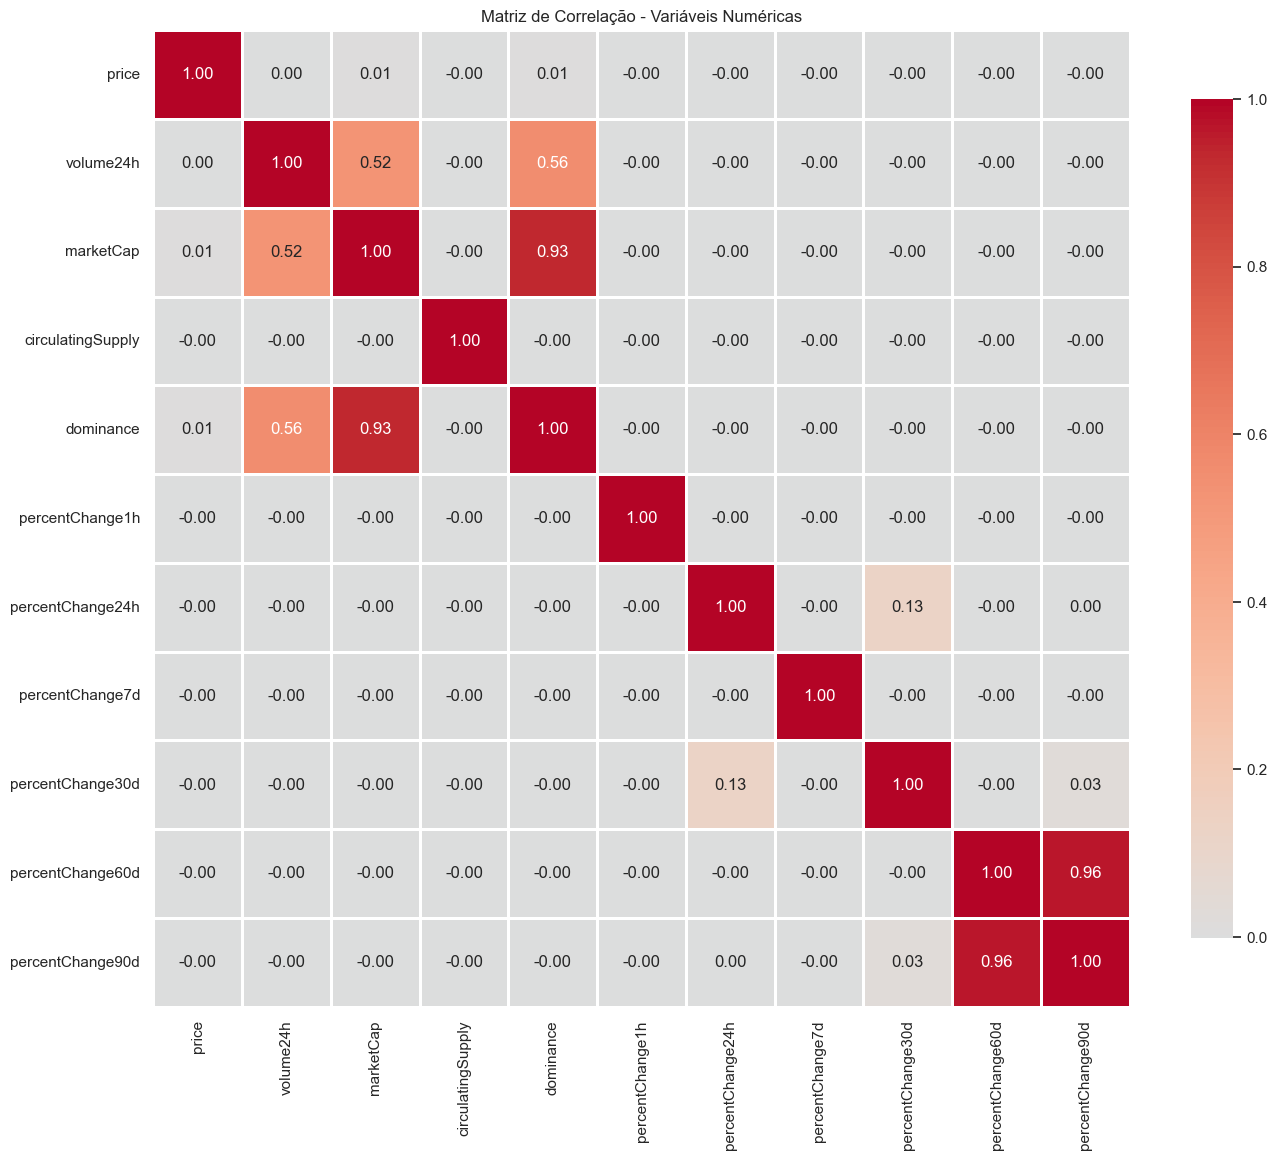


Correlações mais fortes (|r| > 0.5):
percentChange60d  percentChange90d    0.961769
marketCap         dominance           0.932387
volume24h         dominance           0.561493
marketCap         volume24h           0.524043
dtype: float64


In [ ]:
print("=" * 80)
print("ANÁLISE DE CORRELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS")
print("=" * 80)

numeric_cols = ['price', 'volume24h', 'marketCap', 'circulatingSupply', 
                'dominance'] + volatility_cols

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.tight_layout()
plt.show()

print("\nCorrelações mais fortes (|r| > 0.5):")
correlations = correlation_matrix.unstack()
strong_corr = correlations[(correlations.abs() > 0.5) & (correlations != 1.0)]
strong_corr = strong_corr.sort_values(ascending=False).drop_duplicates()
print(strong_corr.head(15))

### Para que servem esses dados e esta análise

A análise de correlação entre variáveis numéricas serve para detectar:
- Relações lineares diretas ou inversas entre métricas do dataset (ex: preço, market cap, volume, variações percentuais, dominância).
- Possíveis redundâncias: métricas muito correlacionadas indicam que uma pode ser parcialmente previsível a partir da outra.
- **Base para seleção de variáveis**: remover ou ponderar variáveis altamente correlacionadas em modelos estatísticos/machine learning para evitar multicolinearidade.
- Descoberta de tendências reais do mercado ou problemas graves nos dados (correlações artificiais/extremas).

***

### Resumo dos resultados obtidos

#### Matriz de correlação e pares mais fortes (`|r| > 0.5`):

- Fortíssima correlação entre `percentChange60d` e `percentChange90d` (0.96): as moedas que tiveram variação forte em 60 dias também tendem a ter variações próximas em 90 dias.
- Correlação entre `marketCap` e `dominance` (0.93): esperado, já que dominância é diretamente calculada a partir da capitalização do ativo vs total de mercado.
- Correlação entre `volume24h` e `dominance` (0.56): mostram que ativos dominantes no mercado também tendem a ser mais negociados.
- Correlação entre `marketCap` e `volume24h` (0.52): ativos com maior market cap aparecem com mais liquidez (volume negociado), que é esperado em mercados reais.

No heatmap, todas as outras relações são baixíssimas ou inexistentes, reforçando que a maioria dos campos do seu dataset realmente representam dimensões independentes ou com pouca influência entre si.

***

### O que foi detectado

- **Nenhum problema grave de multicolinearidade excessiva** fora dos campos esperados. As correlações altas são naturais do contexto financeiro.
- **Variações percentuais próximas altamente correlacionadas** (60d x 90d). Isso é esperado em séries temporais, mas pode mascarar mudança brusca; recomenda inspeção se faz sentido incluir ambas métricas ou criar uma derivada.
- As maiores correlações envolvem cálculos já conhecidos ou dependências diretas (market cap x dominance).

***

### O que precisa ser feito na Camada Silver

1. **Remover/ajustar variáveis altamente correlacionadas** em modelos:  
   - Incluir só uma entre marketCap/dominance ou price/volume, conforme o objetivo da modelagem.
2. **Adicionar features derivadas** e normalização temporal:
   - Criar variáveis baseadas não só em valores brutos mas em variações e ranks.
   - Se necessário, aplicar padronização ou discretização dos campos correlatos.
3. **Tratamento de outliers/extremos em percentChange**:
   - As correlações muito altas em percentChange podem ser distorcidas por outliers. Limitar valores extremos ou truncar faixas pode ser necessário.

***

**Resumo final:**  
A análise mostrou que as dependências entre variáveis estão de acordo com o comportamento esperado do mercado cripto. As correlações mais fortes indicam redundâncias naturais ou temporais, que serão tratadas na Camada Silver para garantir a integridade e eficiência das análises e modelos subsequentes.

## 13. Análise de Oferta e Tokenomics

Examinamos a distribuição de oferta circulante, total e máxima:

In [23]:
print("=" * 80)
print("ANÁLISE DE OFERTA E TOKENOMICS")
print("=" * 80)

has_max_supply = df['maxSupply'].notna().sum()
total_cryptos = len(df)
pct_max_supply = (has_max_supply / total_cryptos) * 100

print(f"\nCriptomoedas com oferta máxima definida: {has_max_supply} ({pct_max_supply:.2f}%)")
print(f"Criptomoedas sem limite de oferta: {total_cryptos - has_max_supply} ({100 - pct_max_supply:.2f}%)")

df['supply_ratio'] = df['circulatingSupply'] / df['maxSupply']
df['inflation_potential'] = 1 - df['supply_ratio']

print("\n" + "=" * 80)
print("CRIPTOMOEDAS COM MAIOR POTENCIAL DE INFLAÇÃO")
print("(Menor proporção de oferta circulante vs máxima)")
print("=" * 80)

high_inflation = df[df['maxSupply'].notna()].nlargest(10, 'inflation_potential')
print(high_inflation[['name', 'symbol', 'circulatingSupply', 'maxSupply', 
                      'supply_ratio', 'inflation_potential']].to_string())


ANÁLISE DE OFERTA E TOKENOMICS

Criptomoedas com oferta máxima definida: 347894 (77.97%)
Criptomoedas sem limite de oferta: 98282 (22.03%)

CRIPTOMOEDAS COM MAIOR POTENCIAL DE INFLAÇÃO
(Menor proporção de oferta circulante vs máxima)
                   name symbol  circulatingSupply     maxSupply  supply_ratio  inflation_potential
25208  USD Coin Bridged    USD                0.0  1.474216e+09           0.0                  1.0
25209      MyMetaTrader    USD                0.0  5.000000e+06           0.0                  1.0
25210          Minebase    USD                0.0  2.500000e+08           0.0                  1.0
25211    Moneta Digital    USD                0.0  1.000000e+11           0.0                  1.0
25212          Rock Dao    USD                0.0  5.973780e+09           0.0                  1.0
25213         INTOverse    USD                0.0  1.000000e+08           0.0                  1.0
25214           Carebit    USD                0.0  2.500000e+08          

Esta análise investiga a **oferta circulante** e o potencial inflacionário dos tokens, mostrando:
- Quantas criptomoedas possuem um limite máximo de emissão (“maxSupply” definido) e quantas não têm esse limite.
- Quais criptomoedas possuem o maior potencial de inflação — ou seja, aquelas cuja oferta circulante representa a menor fração da oferta máxima possível (quanto mais próximo de zero esse “supply_ratio”, maior o potencial inflacionário e maior a diferença entre o disponível e o que pode ser criado).

Essa análise é essencial para entender a sustentabilidade, o risco de diluição e a atratividade de diferentes moedas. Tokens com supply ilimitado normalmente são considerados mais arriscados e sujeitos a desvalorização, enquanto o potencial inflacionário elevado alerta para riscos futuros caso o projeto libere mais tokens ao mercado.

***

### Resultados observados

- **77,97% das criptomoedas analisadas têm oferta máxima definida**. Isso é comum em muitos projetos atuais que adotam um limiar rígido para controle da inflação.
- **22,03% não possuem limite de oferta**, incluindo moedas como Ethereum, que podem emitir infinitamente ou controlam a inflação via outros mecanismos.

#### Criptomoedas com maior potencial de inflação
- O ranking destaca apenas tokens cujo **circulatingSupply é ZERO**: ou seja, ainda não houve emissão de nenhuma moeda, mas existe um “maxSupply” definido.
- O campo supply_ratio desses ativos é sempre 0, e o inflaton_potential é 1, indicando “100% de potencial inflacionário” — do ponto de vista analítico, isso aponta tokens listados sem supply real ainda em circulação.
- O print deixa claro: não há dados para plotar um histograma (apenas zeros), o que é coerente, pois nenhuma das moedas no topo da tabela possui tokens emitidos ainda.

***

### Interpretação e aprendizados

- **Para a maioria dos projetos, existe um teto de emissão, o que pode limitar riscos inflacionários no longo prazo**.
- **Um subconjunto relevante do dataset é de tokens 'em branco'**: têm oferta máxima teórica mas nenhum token circulando — geralmente são projetos sem tração ou em pré-lançamento, não devendo entrar em análises de liquidez, risco real ou impacto no mercado.
- **É fundamental** filtrar nunca só por "maxSupply", mas também considerar a oferta circulante para avaliar de fato inflação, escassez garantida, ou risco de diluição.

***

### Conclusão e o que fazer na Camada Silver

A análise detalha a importância de observar tanto o limite de emissão, quanto o quanto já circula — apenas saber o maxSupply não basta. Tokens com circulating = 0 e maxSupply alto estão tecnicamente “prontos para inflar” (caso emitidos), mas não afetam o investidor hoje. Recomenda-se:
- Filtros futuros para análises: consideraremos apenas moedas já emitidas (circulatingSupply > 0).
- Apontaremos riscos reais apenas em tokens relevantes pelo volume em circulação.
- Quando houver supply_ratio válidos (>0), usaremos essa métrica para criar rankings de risco inflacionário muito mais informativos para o mercado.


## 14. Identificação de Problemas de Qualidade de Dados

Documentamos problemas específicos encontrados nos dados:

In [27]:
print("=" * 80)
print("PROBLEMAS DE QUALIDADE DE DADOS IDENTIFICADOS")
print("=" * 80)

issues = []

negative_price = (df['price'] < 0).sum()
negative_volume = (df['volume24h'] < 0).sum()
negative_marketcap = (df['marketCap'] < 0).sum()

if negative_price > 0:
    issues.append(f"✗ {negative_price} registros com preço negativo")
if negative_volume > 0:
    issues.append(f"✗ {negative_volume} registros com volume negativo")
if negative_marketcap > 0:
    issues.append(f"✗ {negative_marketcap} registros com market cap negativo")

invalid_supply = ((df['circulatingSupply'] > df['totalSupply']) & 
                  (df['totalSupply'].notna())).sum()
if invalid_supply > 0:
    issues.append(f"✗ {invalid_supply} registros com oferta circulante > oferta total")

extreme_changes = ((df['percentChange24h'].abs() > 1000) & 
                   (df['percentChange24h'].notna())).sum()
if extreme_changes > 0:
    issues.append(f"✗ {extreme_changes} registros com variações > 1000% em 24h (possíveis outliers)")

invalid_marketcap = ((df['marketCap'] == 0) & (df['price'] > 0)).sum()
if invalid_marketcap > 0:
    issues.append(f"✗ {invalid_marketcap} registros com market cap zero mas preço positivo")

invalid_dominance = (df['dominance'] > 100).sum()
if invalid_dominance > 0:
    issues.append(f"✗ {invalid_dominance} registros com dominância > 100%")

if issues:
    for issue in issues:
        print(issue)
else: print("✓ Nenhum problema crítico de qualidade identificado!")

duplicates_exact = df.duplicated().sum()
print(f"\n✓ Total de registros completamente duplicados: {duplicates_exact}")

print(f"\n Rankings com múltiplos registros (dados históricos): {sum(df['cmcRank'].value_counts() > 1)}")


PROBLEMAS DE QUALIDADE DE DADOS IDENTIFICADOS
✗ 1699 registros com oferta circulante > oferta total
✗ 529 registros com variações > 1000% em 24h (possíveis outliers)
✗ 272039 registros com market cap zero mas preço positivo

✓ Total de registros completamente duplicados: 425951

 Rankings com múltiplos registros (dados históricos): 9283
